## 1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statistics
import matplotlib.pyplot as plt

## 2. Loading and Reading Dataset

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


## 3. Understanding the Dataset

### Understanding the Shape of the Data

In [3]:
df.shape

(607, 12)

### Getting information about data frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


### Drop the Unnamed Column

In [5]:
df = df.drop(['Unnamed: 0'], axis =1)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Checking Null and duplicate values of the dataset

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.duplicated().sum()

42

Ada 42 data duplikat. Hapus data yang duplikat.

In [8]:
df = df.drop_duplicates()
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Find Outlier in the Dataset

<AxesSubplot:xlabel='salary_in_usd'>

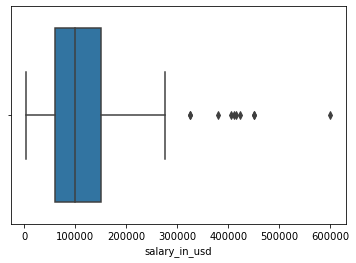

In [9]:
sns.boxplot(x='salary_in_usd',data=df)

In [10]:
print(np.where(df['salary_in_usd']>300000))

(array([ 25,  33,  63,  97, 157, 224, 251, 461, 498, 502], dtype=int64),)


### Drop the Outliers from Dataset

In [11]:
df = df.drop([25,  33,  63,  97, 157, 225, 252, 482, 519, 523])
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Getting list of unique values

In [12]:
dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
work_year,3
experience_level,4
employment_type,4
job_title,49
salary,265
salary_currency,17
salary_in_usd,360
employee_residence,57
remote_ratio,3
company_location,50


### Getting Summary statistics of numerical columns

In [13]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,555.000000,5.550000e+02,555.000000,555.000000
mean,2021.371171,3.366676e+05,105062.781982,69.639640
std,0.694926,1.614186e+06,58981.192674,40.992381
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.611000e+04,60000.000000,50.000000
50%,2021.000000,1.100000e+05,100000.000000,100.000000
75%,2022.000000,1.600000e+05,145500.000000,100.000000
max,2022.000000,3.040000e+07,276000.000000,100.000000


Salary dalam USD akan digunakan karena lebih stabil untuk dibandingkan

In [14]:
#IQR
q75, q25 = np.percentile(df['salary_in_usd'], [75 ,25])
iqr = q75 - q25

#Range
range = max(df['salary_in_usd']) - min(df['salary_in_usd'])

#Midrange
midrange = (max(df['salary_in_usd']) - min(df['salary_in_usd']))/2

CentralTendency = {}
CentralTendency['Median'] = df['salary_in_usd'].median()
CentralTendency['Mode'] = df['salary_in_usd'].mode()[0]
CentralTendency['IQR'] = iqr
CentralTendency['Range'] = range
CentralTendency['Midrange'] = midrange
CentralTendency

{'Median': 100000.0,
 'Mode': 100000,
 'IQR': 85500.0,
 'Range': 273141,
 'Midrange': 136570.5}

### Histogram Salary in USD

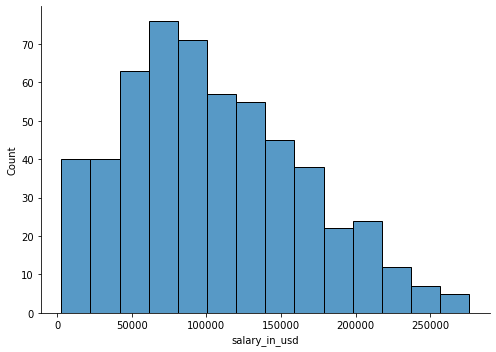

In [15]:
sns.displot(
  data=df,
  x="salary_in_usd",
  kind="hist",
  aspect=1.4
)

# 4. Data Visualization

### Top Job Titles

In [16]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
jobs.head()

,job_title,0
21,Data Scientist,129
16,Data Engineer,120
12,Data Analyst,82
37,Machine Learning Engineer,39
47,Research Scientist,15


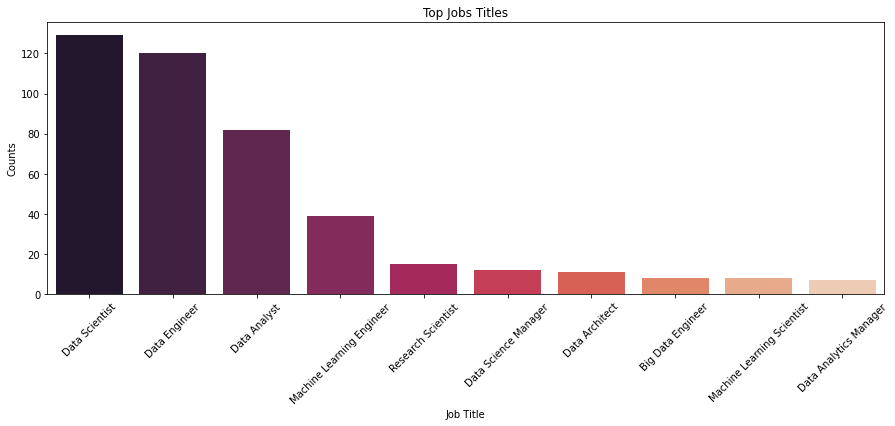

In [22]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

sns.barplot(x='job_title',y=0,data = jobs[:10],palette = 'rocket')
plt.title('Top Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Data Scientist adalah pekerjaan yang paling banyak diikuti dengan pekerjaan lainnya.

### Top Employee Residence

In [23]:
employee_residence = df.groupby('employee_residence').size().reset_index().sort_values(by=0,ascending = False)
employee_residence.head()


,employee_residence,0
55,US,285
20,GB,43
27,IN,30
8,CA,27
14,DE,24


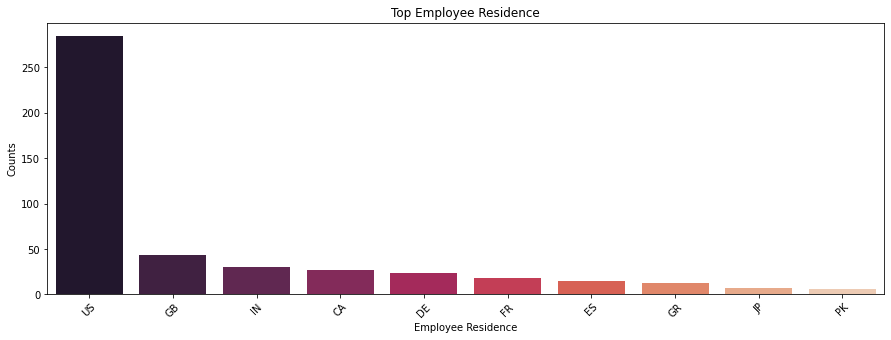

In [24]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

sns.barplot(x='employee_residence',y=0,data = employee_residence[:10],palette = 'rocket')
plt.title('Top Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Kebanyakkan pekerja tinggal di US

### Company Location

In [20]:
company_locations = df.company_location.value_counts()
company_locations.head()

US    308
GB     46
CA     28
DE     27
IN     24
Name: company_location, dtype: int64

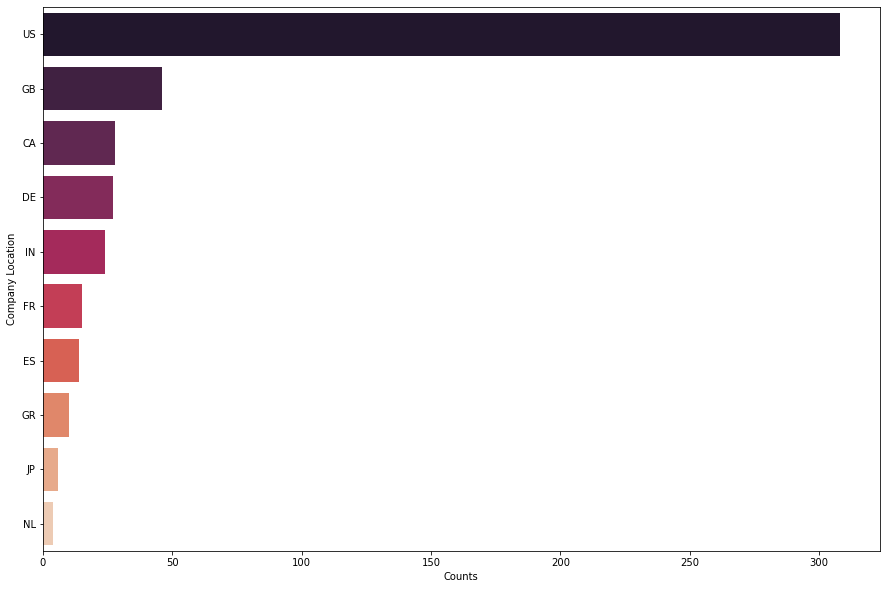

In [21]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

sns.barplot(x=company_locations.values[:10],y=company_locations.index[:10],palette = 'rocket')
plt.ylabel('Company Location')
plt.xlabel('Counts')
plt.show()

Kebanyakkan perusahaan data science berada di US

### Employees in Every Year

<Figure size 1080x720 with 0 Axes>

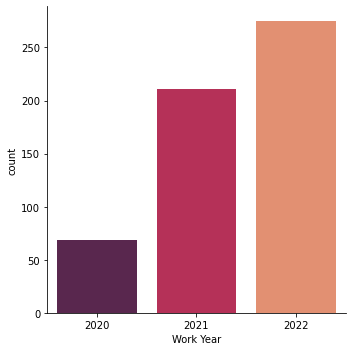

In [22]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

sns.catplot(x='work_year',data = df,kind = 'count',palette = 'rocket')
plt.xlabel('Work Year')
plt.show()

### Company Size

In [23]:
df.company_size.replace(['L','M','S'], ['Large', 'Medium', 'Small'], inplace = True)
company_size = df.company_size.value_counts()
company_size

Medium    288
Large     186
Small      81
Name: company_size, dtype: int64

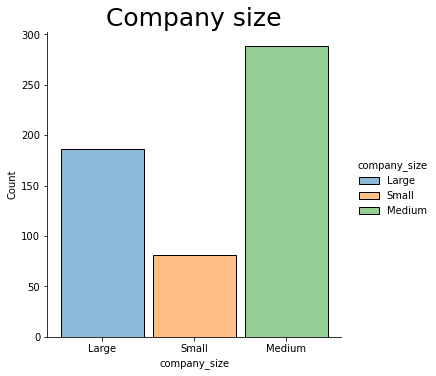

In [24]:
sns.displot(df,x='company_size',hue='company_size',shrink=0.9)
plt.title('Company size',size=25,color='black');

Perusahaan yang paling banyak adalah perusahaan yang berukuran medium

### Level of Experience

In [25]:
levels = df.experience_level.value_counts()
levels

SE    240
MI    205
EN     88
EX     22
Name: experience_level, dtype: int64

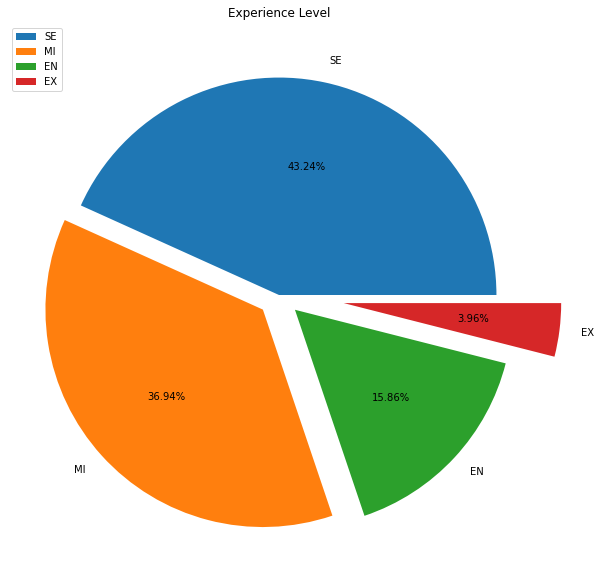

In [26]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

explode = [0,0.1,0.1, 0.3]
plt.pie(x = levels.values,labels =levels.index,autopct='%1.2f%%',explode = explode)
plt.title('Experience Level')
plt.legend()
plt.show()

Pekerja paling banyak ada di level Senior

### Types of Employee

In [27]:
df.employment_type = df.employment_type.replace(['FT', 'CT', 'PT', 'FL'],['Full-time','Contract','Part-time','Freelance'])
emp_type = df.employment_type.value_counts()
emp_type

Full-time    537
Part-time     10
Contract       4
Freelance      4
Name: employment_type, dtype: int64

<Figure size 1080x720 with 0 Axes>

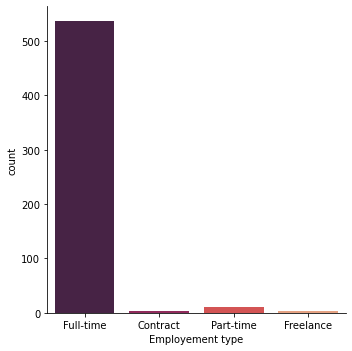

In [28]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

sns.catplot(x='employment_type',data = df,kind = 'count',palette = 'rocket')
plt.xlabel('Employement type')
plt.show()

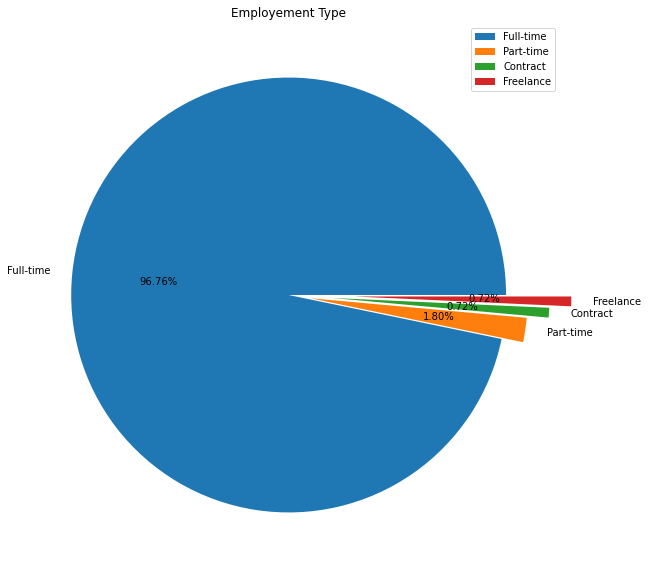

In [29]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

explode = [0,0.1,0.2, 0.3]
plt.pie(x = emp_type.values,labels =emp_type.index,autopct='%1.2f%%',explode = explode)
plt.title('Employement Type')
plt.legend()
plt.show()

Tipe perkeja paling banyak adalah pekerja Full-time

### Remote Ratio

In [30]:
df.remote_ratio = df.remote_ratio.replace([0, 50, 100],['0n-site','Hybrid','Remote'])
remote_ratio = df.remote_ratio.value_counts()
remote_ratio

Remote     338
0n-site    120
Hybrid      97
Name: remote_ratio, dtype: int64

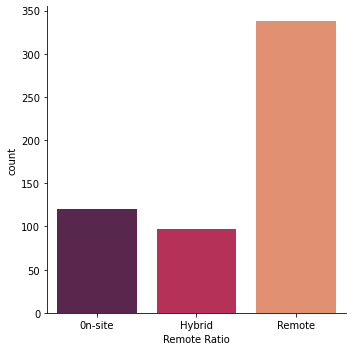

In [31]:
sns.catplot(x='remote_ratio',data = df,kind = 'count',palette = 'rocket')
plt.xlabel('Remote Ratio')
plt.show()

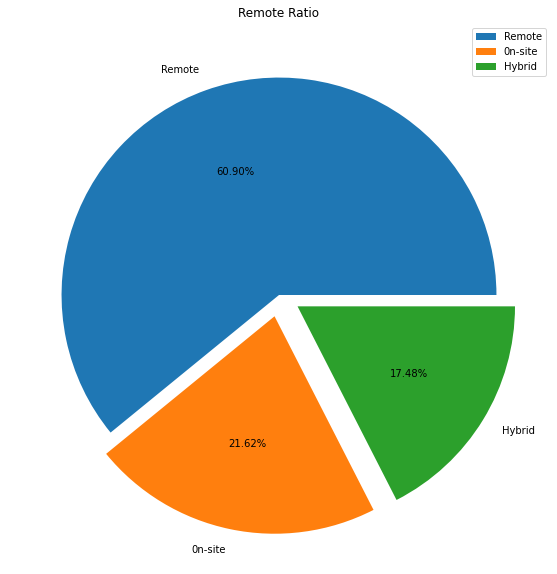

In [32]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)


explode = [0,0.1,0.1]
plt.pie(x = remote_ratio.values,labels =remote_ratio.index,autopct='%1.2f%%',explode = explode)
plt.title('Remote Ratio')
plt.legend()
plt.show()

### Histogram Data Gaji dalam USD

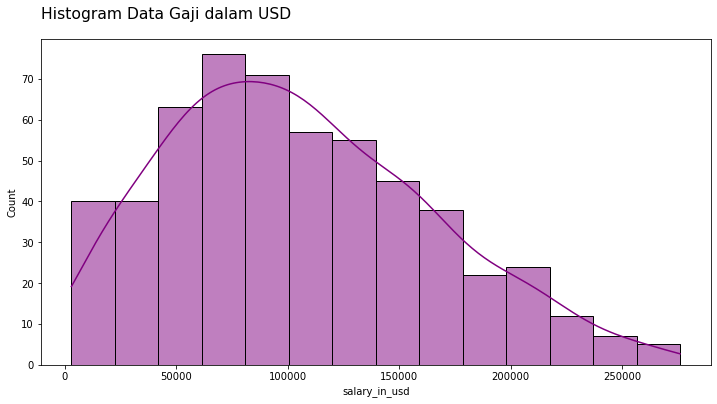

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 13})

ax = sns.histplot(data=df, x="salary_in_usd", kde=True, color="purple")


ax.set_title('Histogram Data Gaji dalam USD', pad=20, loc="left")
plt.show()

### Eksport CSV

In [34]:
df.to_csv('Salary Data Cleaned.csv', index = False)

In [35]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Full-time,Data Scientist,70000,EUR,79833,DE,0n-site,DE,Large
1,2020,SE,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0n-site,JP,Small
2,2020,SE,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,2020,MI,Full-time,Product Data Analyst,20000,USD,20000,HN,0n-site,HN,Small
4,2020,SE,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Full-time,Data Engineer,154000,USD,154000,US,Remote,US,Medium
603,2022,SE,Full-time,Data Engineer,126000,USD,126000,US,Remote,US,Medium
604,2022,SE,Full-time,Data Analyst,129000,USD,129000,US,0n-site,US,Medium
605,2022,SE,Full-time,Data Analyst,150000,USD,150000,US,Remote,US,Medium
